In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import time
import os
import json
import re

from rdflib.util import first
from spacy.lang.ja.syntax_iterators import labels

%load_ext autoreload
%autoreload 2



In [ ]:
COUNTRIES_DICT = {
    "Q29": {"country": "Spain", "languages": ["es", "ca", "gl", "eu"], "flag": "ES"},  # Spanish, Catalan, Galician, Basque
    "Q45": {"country": "Portugal", "languages": ["pt"], "flag": "PT"},  # Portuguese
    "Q142": {"country": "France", "languages": ["fr"], "flag": "FR"},  # French
    "Q233": {"country": "Malta", "languages": ["mt"], "flag": "MT"},  # Maltese
    "Q41": {"country": "Greece", "languages": ["el"], "flag": "GR"},  # Greek
    "Q38": {"country": "Italy", "languages": ["it"], "flag": "IT"},  # Italian
    "Q183": {"country": "Germany", "languages": ["de"], "flag": "DE"},  # German
    "Q31": {"country": "Belgium", "languages": ["nl", "fr", "de"], "flag": "BE"},  # Dutch, French, German
    "Q55": {"country": "Netherlands", "languages": ["nl"], "flag": "NL"},  # Dutch
    "Q34": {"country": "Sweden", "languages": ["sv"], "flag": "SE"},  # Swedish
    "Q20": {"country": "Norway", "languages": ["no", "nb", "nn"], "flag": "NO"},  # Norwegian
    "Q33": {"country": "Finland", "languages": ["fi", "sv"], "flag": "FI"},  # Finnish, Swedish
    "Q211": {"country": "Latvia", "languages": ["lv"], "flag": "LV"},  # Latvian
    "Q191": {"country": "Estonia", "languages": ["et"], "flag": "EE"},  # Estonian
    "Q37": {"country": "Lithuania", "languages": ["lt"], "flag": "LT"},  # Lithuanian
    "Q36": {"country": "Poland", "languages": ["pl"], "flag": "PL"},  # Polish
    "Q28": {"country": "Hungary", "languages": ["hu"], "flag": "HU"},  # Hungarian
    "Q218": {"country": "Romania", "languages": ["ro"], "flag": "RO"},  # Romanian
    "Q214": {"country": "Slovakia", "languages": ["sk"], "flag": "SK"},  # Slovak
    "Q213": {"country": "Czech Republic", "languages": ["cs"], "flag": "CZ"},  # Czech
    "Q215": {"country": "Slovenia", "languages": ["sl"], "flag": "SI"}  # Slovene
}
with open('./data/country_dictionary.json', 'w', encoding='utf-8') as f:
    json.dump(COUNTRIES_DICT, f, ensure_ascii=False, indent=4)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
class_df.loc[class_df["country"] == "Q20", ["class_ids", "names", "classes"]] = "Unknown"
class_df.to_csv("./data/wikidata_organization_classes.csv", index=False)

In [ ]:
import pandas as pd
from orgpackage.dataprocesser import extract_wikidata_classes, plot_data_classes

extract_wikidata_classes("./data/wikidata_organization_classes.csv", english_label=False)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
unknown_df = class_df[class_df["classes"] == "Unknown"]
from orgpackage.dataprocesser import plot_data_volume
plot_data_volume(unknown_df)

In [ ]:
class_df = pd.read_csv("./data/wikidata_organization_classes.csv")
known_df = class_df[class_df["classes"] != "Unknown"]
plot_data_volume(known_df)

known_df.loc[:, "names"] = known_df["names"].str.split(",")
known_df.loc[:, "class_ids"] = known_df["class_ids"].str.split(",")
known_df.loc[:, "classes"] = known_df["classes"].str.split(",")
known_df.to_csv("./data/wikidata_organizations_dataset.csv", index=False)

In [ ]:
entity_dict = {
    "local_government": "Q6501447",
    "hospital": "Q16917",
    "university_hospital": "Q1059324",
    "public_school": "Q1080794",
    "school": "Q3914",
    "educational_institution": "Q2385804",
    "primary_school": "Q9842",
    "secondary_school": "Q159334"
}
with open('./data/entity_dictionary.json', 'w', encoding='utf-8') as f:
    json.dump(entity_dict, f, ensure_ascii=False, indent=4)

In [ ]:
from orgpackage.dataprocesser import obtain_subhierarchy
#
#Q6501447 -local government
#Q16917 - hospital
#Q1059324 - university hospital
#Q1080794 - public school
#Q3914 - school
# Q2385804 - educational institution
# obtain_subhierarchy('Q6501447')
# obtain_subhierarchy('Q16917')
# obtain_subhierarchy('Q1080794')
# obtain_subhierarchy('Q3914')
obtain_subhierarchy(entity_dict["primary_school"])
obtain_subhierarchy(entity_dict["secondary_school"])

In [ ]:
from orgpackage.dataprocesser import plot_data_volume

org_df = pd.read_csv("./data/wikidata_organizations_dataset.csv")
uhospital_df =  pd.read_csv("./data/wikidata_Q1059324_hierarchy.csv")
lgov_df =  pd.read_csv("./data/wikidata_Q6501447_hierarchy.csv")
hospital_df =  pd.read_csv("./data/wikidata_Q16917_hierarchy.csv")
school_df =  pd.read_csv("./data/wikidata_Q3914_hierarchy.csv")
pschool_df = pd.read_csv("./data/wikidata_"+entity_dict["primary_school"]+"_hierarchy.csv")
sschool_df = pd.read_csv("./data/wikidata_"+entity_dict["secondary_school"]+"_hierarchy.csv")
  
plot_data_volume([org_df, hospital_df, uhospital_df],['organizations','hospitals','university hospitals'])
plot_data_volume([org_df, lgov_df],['organizations','local governments'])
plot_data_volume([org_df, school_df, pschool_df, sschool_df],['organizations','schools','primary schools','secondary schools'])

In [ ]:
from orgpackage.dataprocesser import enricher
enriched_df = enricher()
display(enriched_df)
plot_data_classes(enriched_df)
from orgpackage.dataprocesser import load_dataset
#org_df = pd.read_csv('./data/wikidata_organization_classes.csv')
#display(org_df)

In [ ]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
import json  
from orgpackage.dataprocesser import *
with open('./data/entity_dictionary.json', 'r', encoding='utf-8') as f:
    entity_dict = json.load(f)
dfs = []
lbls = []
for cls in entity_dict:
    dfs.append(pd.read_csv("./data/wikidata_"+cls+"_dataset.csv"))
    lbls.append(cls)
plot_data_volume(dfs, labels=lbls)

In [ ]:
for cls in ['Q16917', 'Q1059324', 'Q6501447', 'Q3914', 'Q1080794']:
    df = pd.read_csv("./data/wikidata_"+entity_dict[cls]+"_dataset.csv")
    df['class_ids'] = df['class_ids'].apply(ast.literal_eval)
    df['classes'] = df['classes'].apply(ast.literal_eval)
    top_100_classes = most_common_classes(df)[:25]  # Get first 100 elements
    class_df = pd.DataFrame(top_100_classes, columns=['class', 'count'])
    display(class_df)


In [ ]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
print(enriched_df.columns)

In [ ]:
from orgpackage.dataprocesser import plot_data_classes, load_dataset
#enriched_df = load_dataset("./data/wikidata_enriched_dataset.csv")

plot_data_classes(enriched_df)

In [ ]:
counts =enriched_df[enriched_df['university hospital']==1]['country'].value_counts()
print((counts[counts>10].keys()))

In [ ]:
from orgpackage.dataprocesser import load_dataset
import pandas as pd

df = load_dataset('./data/wikidata_enriched_dataset.csv')
df["names"] = df["names"].apply(lambda x: x[0])
display(df)
df['names'].apply(len).value_counts()

In [ ]:
from orgpackage.dataprocesser import load_dataset
df = load_dataset('./data/wikidata_enriched_dataset.csv')
df = df.loc[df['country']!='Q20']
display(df)
df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [ ]:
import ssl
import certifi
import os

os.environ["SSL_CERT_FILE"] = certifi.where()
ssl._create_default_https_context = ssl._create_unverified_context 
from orgpackage.dataprocesser import extract_wikidata_instances
extract_wikidata_instances()

In [ ]:
from orgpackage.dataprocesser import read_raw_instance_results
df = read_raw_instance_results()
#print(df.groupby('country').count())

In [ ]:
print(len(df))

In [ ]:
from orgpackage.dataprocesser import *
df.to_csv("./data/wikidata_org_extra.csv", index=False)
generate_clean_class_df("./data/wikidata_org_extra.csv", "./data/wikidata_org_extra.csv")
extract_wikidata_classes("./data/wikidata_org_extra.csv", english_label=False)
extract_wikidata_classes("./data/wikidata_org_extra.csv", english_label=True)

In [ ]:
# 
for class_id in ["Q6501447","Q16917","Q9842","Q159334"]:
    extract_wikidata_instances(class_id=class_id)
    read_raw_instance_results(class_id=class_id).to_csv("./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    generate_clean_class_df("./data/wikidata_"+class_id+"_hierarchy_extra.csv", "./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    extract_wikidata_classes("./data/wikidata_"+class_id+"_hierarchy_extra.csv", english_label=False)
    extract_wikidata_classes("./data/wikidata_"+class_id+"_hierarchy_extra.csv", english_label=True)
    df_original = pd.read_csv("./data/wikidata_"+class_id+"_hierarchy.csv")
    new_df = pd.read_csv("./data/wikidata_"+class_id+"_hierarchy_extra.csv")
    pd.concat([new_df, df_original], ignore_index=True).to_csv("./data/wikidata_"+class_id+"_hierarchy.csv", index=False)
    import os
    os.remove("./data/wikidata_"+class_id+"_hierarchy_extra.csv")


In [ ]:
entity_dict = {
    "local_government": "Q6501447",
    "hospital": "Q16917",
    "university_hospital": "Q1059324",
    "public_school": "Q1080794",
    "school": "Q3914",
    "educational_institution": "Q2385804",
    "primary_school": "Q9842",
    "secondary_school": "Q159334"
}
for cls in ['hospital','university_hospital','local_government','primary_school', 'secondary_school']:
    class_df = pd.read_csv("./data/wikidata_"+entity_dict[cls]+"_hierarchy.csv")
    class_df = class_df.drop(columns=['Unnamed: 0']) # I messed up index storing somewhere in the hierarchy generation
    known_df = class_df[class_df["classes"] != "Unknown"]
    known_df.loc[:, "names"] = known_df["names"].str.split(",")
    known_df.loc[:, "class_ids"] = known_df["class_ids"].str.split(",")
    known_df.loc[:, "classes"] = known_df["classes"].str.split(",")
    known_df.to_csv("./data/wikidata_"+cls+"_dataset.csv", index=False)


aux hospital
6974
before hospital
1239
after hospital
6974
aux university_hospital
186
before university_hospital
186
after university_hospital
186
aux local_government
18617
before local_government
3182
after local_government
18617
aux primary_school
24568
before primary_school
4434
after primary_school
24568
aux secondary_school
15762
before secondary_school
3661
after secondary_school
15762


,instance,country,names,class_ids,classes,hospital,university_hospital,local_government,primary_school,secondary_school
0,http://www.wikidata.org/entity/Q112984500,Q142,Foyer Logement de Guer,[http://www.wikidata.org/entity/Q30114662],[accommodation facility for dependent elderly ...,0,0,0,0,0
1,http://www.wikidata.org/entity/Q174928,Q142,Saint-André-d'Allas,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
2,http://www.wikidata.org/entity/Q1167843,Q142,Ménonval,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
3,http://www.wikidata.org/entity/Q119718461,Q142,54e régiment d'artillerie coloniale,[http://www.wikidata.org/entity/Q176799],[military unit],0,0,0,0,0
4,http://www.wikidata.org/entity/Q1049782,Q142,Han-devant-Pierrepont,[http://www.wikidata.org/entity/Q484170],[commune of France],0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
182532,http://www.wikidata.org/entity/Q113813349,Q55,Dalton College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182533,http://www.wikidata.org/entity/Q116194320,Q55,Wings Niekée Agoraschool,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182534,http://www.wikidata.org/entity/Q116353302,Q55,Sweelinck College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1
182535,http://www.wikidata.org/entity/Q130889779,Q55,Eijkhagen College,[http://www.wikidata.org/entity/Q159334],[secondary school],0,0,0,0,1


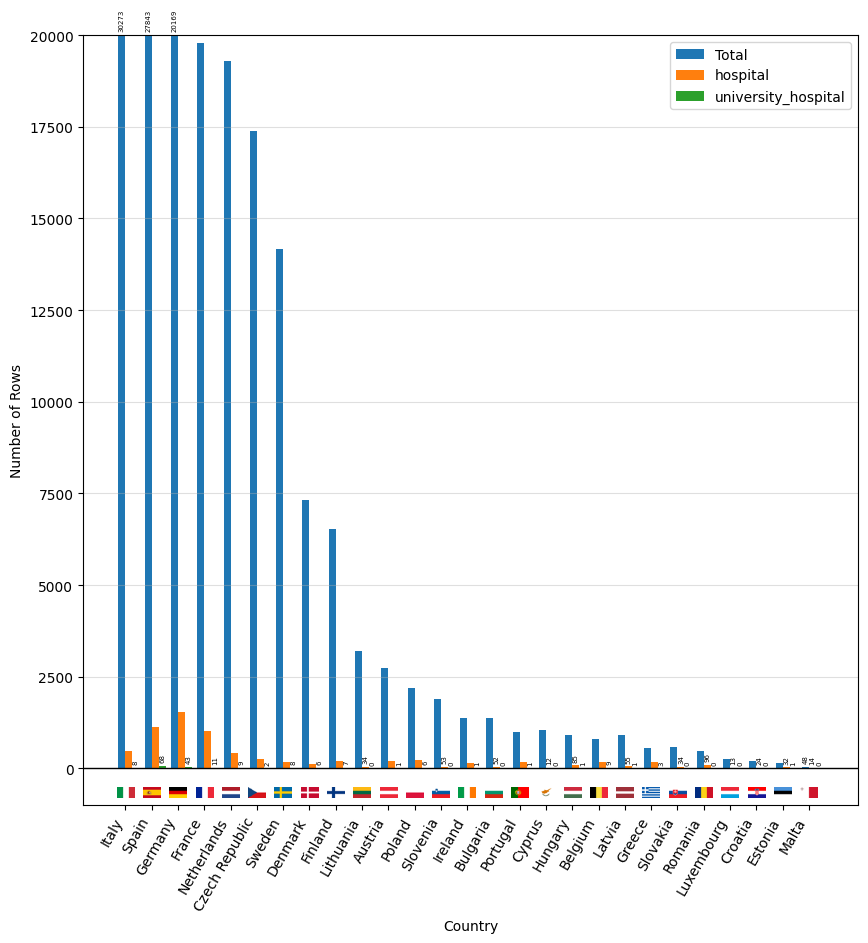

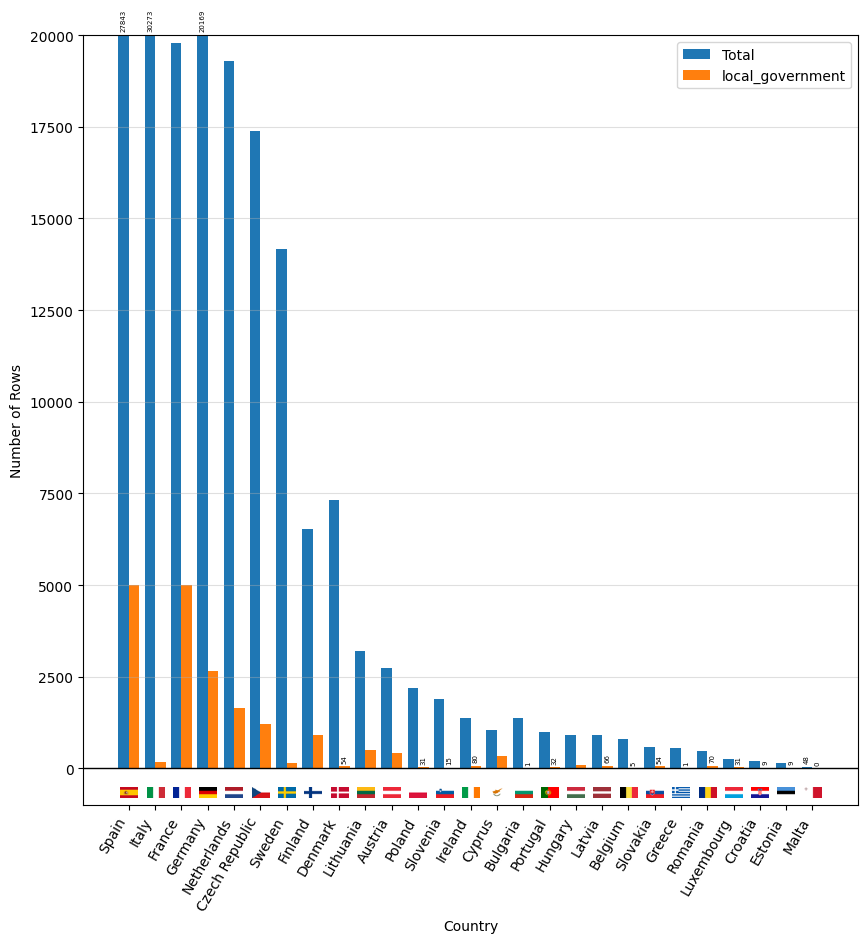

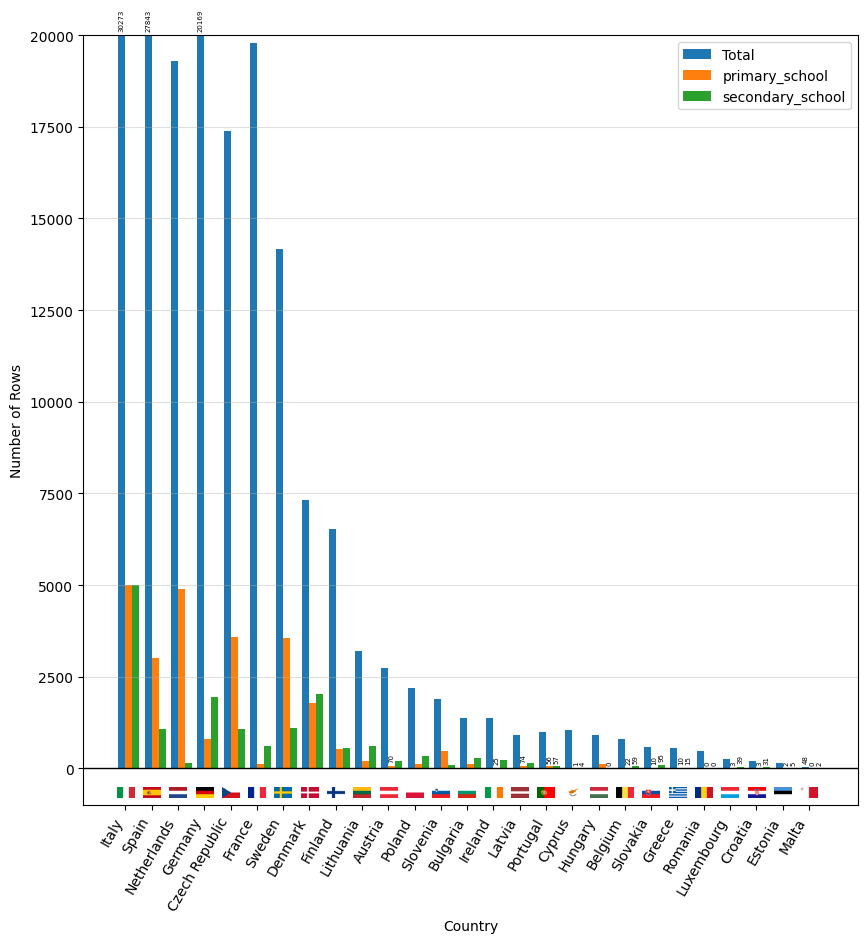

In [1]:
from orgpackage.dataprocesser import enricher, plot_data_classes
enriched_df = enricher()
display(enriched_df)
plot_data_classes(enriched_df)

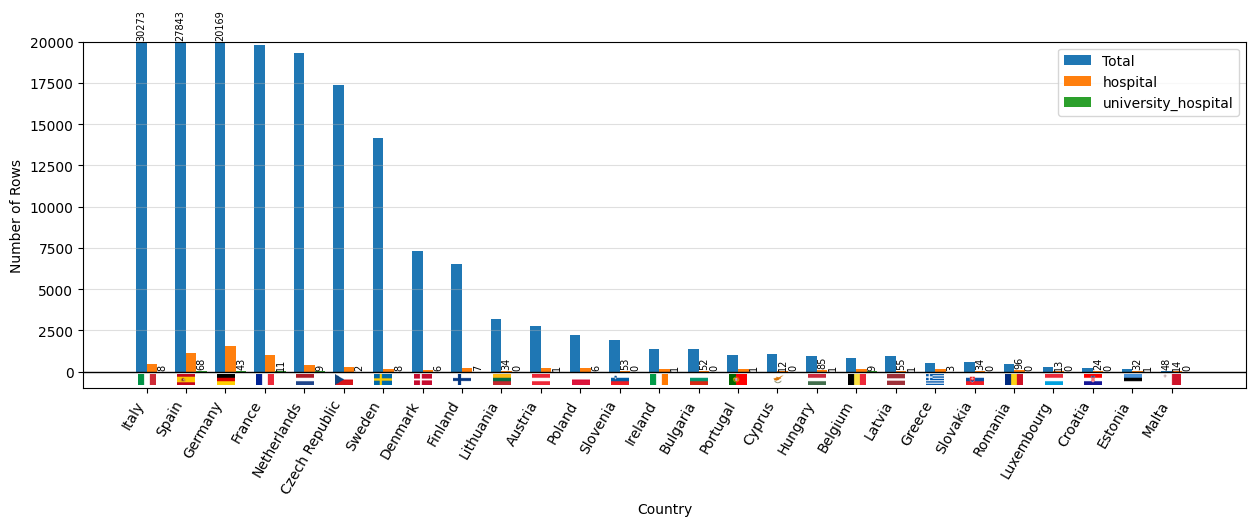

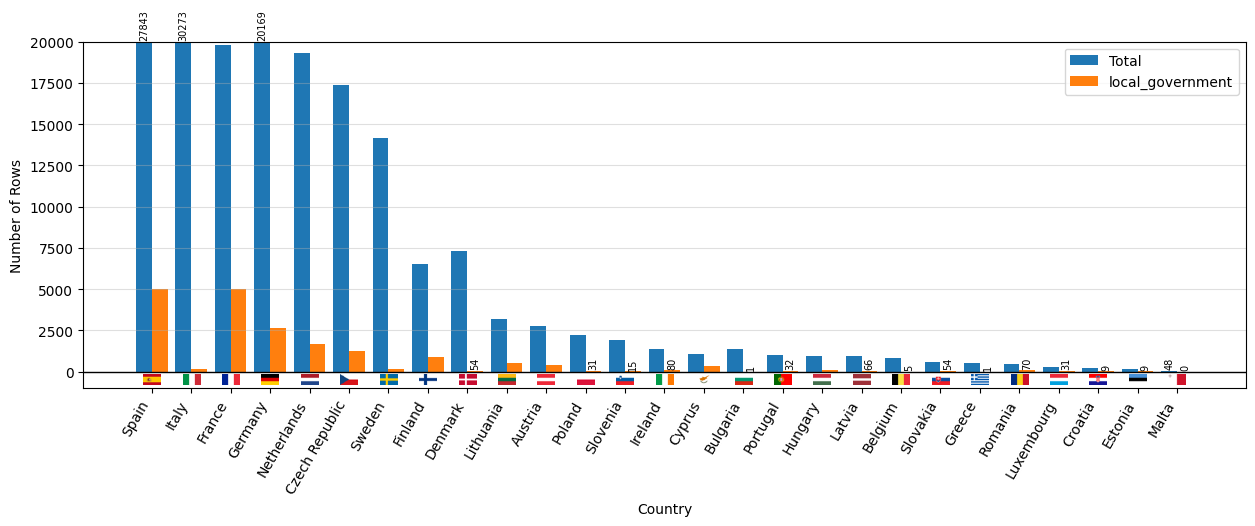

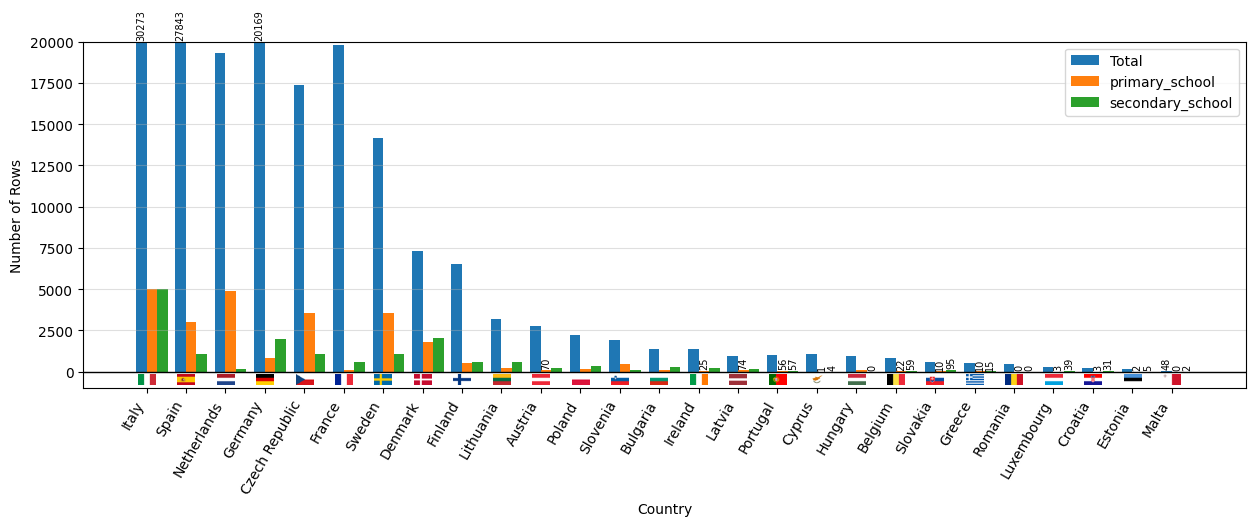

In [10]:
from orgpackage.dataprocesser import plot_data_classes
enriched_df = pd.read_csv("./data/wikidata_enriched_dataset.csv")
plot_data_classes(enriched_df)

In [2]:
enriched_df.to_csv("./data/wikidata_enriched_dataset.csv", index=False)

In [8]:
dfo = pd.read_csv("./data/wikidata_enriched_dataset.csv")
display(dfo)

,instance,country,names,class_ids,classes,hospital,university_hospital,local_government,primary_school,secondary_school
0,http://www.wikidata.org/entity/Q112984500,Q142,Foyer Logement de Guer,['http://www.wikidata.org/entity/Q30114662'],['accommodation facility for dependent elderly...,0,0,0,0,0
1,http://www.wikidata.org/entity/Q174928,Q142,Saint-André-d'Allas,['http://www.wikidata.org/entity/Q484170'],['commune of France'],0,0,0,0,0
2,http://www.wikidata.org/entity/Q1167843,Q142,Ménonval,['http://www.wikidata.org/entity/Q484170'],['commune of France'],0,0,0,0,0
3,http://www.wikidata.org/entity/Q119718461,Q142,54e régiment d'artillerie coloniale,['http://www.wikidata.org/entity/Q176799'],['military unit'],0,0,0,0,0
4,http://www.wikidata.org/entity/Q1049782,Q142,Han-devant-Pierrepont,['http://www.wikidata.org/entity/Q484170'],['commune of France'],0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
182532,http://www.wikidata.org/entity/Q113813349,Q55,Dalton College,['http://www.wikidata.org/entity/Q159334'],['secondary school'],0,0,0,0,1
182533,http://www.wikidata.org/entity/Q116194320,Q55,Wings Niekée Agoraschool,['http://www.wikidata.org/entity/Q159334'],['secondary school'],0,0,0,0,1
182534,http://www.wikidata.org/entity/Q116353302,Q55,Sweelinck College,['http://www.wikidata.org/entity/Q159334'],['secondary school'],0,0,0,0,1
182535,http://www.wikidata.org/entity/Q130889779,Q55,Eijkhagen College,['http://www.wikidata.org/entity/Q159334'],['secondary school'],0,0,0,0,1


In [11]:
import ast
df = pd.read_csv("./data/euhub_extraction.csv")
df['Contracting Authority'] = df['Contracting Authority'].apply(ast.literal_eval)
print(df['Contracting Authority'].apply(len).mean()) #Since there seem to be one CA per contract we get rid of the list
df['Contracting Authority'] = df['Contracting Authority'].apply(lambda x: x[0] if x else None)
df['Contract Year'] = df['Document ID'].apply(lambda x: int(x.split('-')[-1]))
# Function to flatten a nested dictionary
def flatten_dict(d, parent_key='', sep='_'):
    """
    Flattens a nested dictionary into a single level with concatenated keys.
    """
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

flat_ca = df["Contracting Authority"].apply(lambda x: flatten_dict(x) if x else {})
flat_ca_df = pd.DataFrame(flat_ca.tolist())  # Expand into new DataFrame columns

# Combine original DataFrame with flattened DataFrame
df = pd.concat([df, flat_ca_df], axis=1)
display(df)

1.0


,Document ID,Contracting Authority,Healthcare Authority Class,Healthcare CPV,Contract Year,Address_Territorial Unit (NUTS3),Address_Postal Code,Address_Address,Address_Town,Address_Country,National ID,Activity,CA Type,Name,Contact_Email,Contact_Phone,Contact_URL
0,00094853-2021,{'Address': {'Territorial Unit (NUTS3)': 'RO42...,Non-Healthcare Direct Procurer,True,2021,RO422,320210,Str. Făgărașului nr. 18,Reșita,RO,1061626,HEALTH,-,Spitalul Județean Reșita,compartimentachizitii@gmail.com,+40 255227830/106,www.spitaluljudeteanresita.ro
1,00094707-2021,{'Address': {'Territorial Unit (NUTS3)': 'HU23...,Non-Healthcare Direct Procurer,False,2021,HU231,7622,Vasvári Pál utca 4.,Pécs,HU,EKRSZ_89809802,-,-,Pécsi Tudományegyetem,onhausz.nikolett@pte.hu,+36 309147518,http://www.pte.hu
2,00095625-2021,{'Address': {'Territorial Unit (NUTS3)': 'FRF1...,Non-Healthcare Direct Procurer,False,2021,FRF11,67604,"9 place d'Armes, BP 40188",Sélestat Cedex,FR,-,GENERAL_PUBLIC_SERVICES,REGIONAL_AUTHORITY,Ville de Sélestat,marches.publics@ville-selestat.fr,+33 388588500,http://www.selestat.fr
3,00095656-2021,{'Address': {'Territorial Unit (NUTS3)': 'DEA3...,Non-Healthcare Direct Procurer,False,2021,DEA36,45657,Kurt-Schumacher-Allee 1,Recklinghausen,DE,-,GENERAL_PUBLIC_SERVICES,REGIONAL_AUTHORITY,"Kreis Recklinghausen, Der Landrat",vergabestelle@kreis-re.de,-,www.kreis-re.de
4,00094926-2021,"{'Address': {'Territorial Unit (NUTS3)': 'NL',...",Non-Healthcare Direct Procurer,False,2021,NL,3526 KV,Winthontlaan 2,Utrecht,NL,111590197,-,BODY_PUBLIC,Stichting Nederlandse Wetenschappelijk Onderzo...,sanders@its-projects.nl,+31 572362240,http://www.nwo-i.nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354930,00267886-2018,{'Address': {'Territorial Unit (NUTS3)': 'FRL0...,Non-Healthcare Direct Procurer,False,2018,FRL04,13402,31 chemin Joseph Aiguier,Marseille Cedex 20,FR,180089013 01724,-,-,CNRS Délégation Provence et Corse,appel.offres@dr12.cnrs.fr,+33 491164014,http://www.provence-corse.cnrs.fr
1354931,00268760-2018,{'Address': {'Territorial Unit (NUTS3)': 'CZ01...,Non-Healthcare Direct Procurer,False,2018,CZ010,140 21,Vídeňská 1958/9,Praha 4,CZ,00023001,HEALTH,MINISTRY,Institut klinické a experimentální medicíny,pikm@ikem.cz,+420 261365056,http://www.ikem.cz
1354932,00267417-2018,{'Address': {'Territorial Unit (NUTS3)': 'DE14...,Non-Healthcare Direct Procurer,False,2018,DE142,72076,Schnarrenbergstraße 1,Tübingen,DE,-,ECONOMIC_AND_FINANCIAL_AFFAIRS,REGIONAL_AUTHORITY,"Land Baden-Württemberg, vertreten durch den La...",poststelle.amttue@vbv.bwl.de,+49 7071-29-79012,www.vba-tuebingen.de
1354933,00268921-2018,{'Address': {'Territorial Unit (NUTS3)': 'FRJ1...,Non-Healthcare Direct Procurer,False,2018,FRJ13,34027,"BP 2200, Esplanade Charles de Gaulle",Montpellier Cedex 1,FR,-,-,-,SAEML Montpellier Events,service-achats@montpellier-events.com,+33 467616756,http://www.montpellier-events.com


In [14]:
name_to_country = df.drop_duplicates(subset='Name').set_index('Name')['Address_Country'].to_dict()

In [26]:

dff = pd.read_csv("./data/euhub_dataset.csv", sep = ';')
dff = dff[['Name','Class']]
dff['Country'] = dff['Name'].map(name_to_country)

from orgpackage.config import COUNTRY_DICT
code_to_qid = {v['flag']: k for k, v in COUNTRY_DICT.items()}
dff['Country'] = dff['Country'].map(code_to_qid)

dff = dff.rename(columns={'Name': 'names', 'Country': 'country'})

dff['hospital'] = dff['Class'].apply(lambda x: 1 if x == 'Hospital' else 0)
dff['university_hospital'] = dff['Class'].apply(lambda x: 1 if x == 'University Hospital' else 0)
dff['local_government'] = dff['Class'].apply(lambda x: 1 if x == 'Government' else 0)
dff = dff.dropna(subset=['country'])
# Display the dataframe
display(dff)
dff.to_csv('data/euhub_dataset.csv', index=False)

,names,Class,country,hospital,university_hospital,local_government
0,Steiermärkische Krankenanstaltengesellschaft m...,University Hospital,Q40,0,1,0
1,OCMW Dendermonde,Social Welfare Center,Q31,0,0,0
2,„МБАЛ „Д-р Иван Селимински“ — Сливен“ АД,Hospital,Q219,1,0,0
3,"Nemos Sokolov, s.r.o.",Hospital,Q213,1,0,0
4,Kreiskrankenhaus Demmin GmbH,Hospital,Q183,1,0,0
...,...,...,...,...,...,...
165,Município da Amadora,Government,Q45,0,0,1
166,Spital Orasenesc Pucioasa,Hospital,Q218,1,0,0
167,Försäkringskassan,Insurance,Q34,0,0,0
168,MINISTRSTVO ZA FINANCE FINANČNA UPRAVA REPUBLI...,Government,Q215,0,0,1


In [21]:
display(dff[dff['country'].isna()])

,names,Class,country,hospital,university_hospital,local_government
13,Ríkiskaup (The Central Public Procurment),Procurement,NaN,0,0,0
18,Eidskog Kommune,Government,NaN,0,0,1
24,Derby Homes Ltd,Housing,NaN,0,0,0
38,Consensa lögfræðiþjónusta ehf,Procurement,NaN,0,0,0
42,Institute for lung diseases and TB,Research,NaN,0,0,0
45,Moss kommune,Government,NaN,0,0,1
52,The Newcastle upon Tyne Hospitals NHS Foundati...,University Hospital,NaN,0,1,0
56,Alterszentren Stadt Zürich,Nursing Home,NaN,0,0,0
68,Landspitali — The National University Hospital...,University Hospital,NaN,0,1,0
70,Ersatzanschaffung CT an Landesspital Liechtens...,Hospital,NaN,1,0,0
